/tmp/ipython-input-2931677451.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)


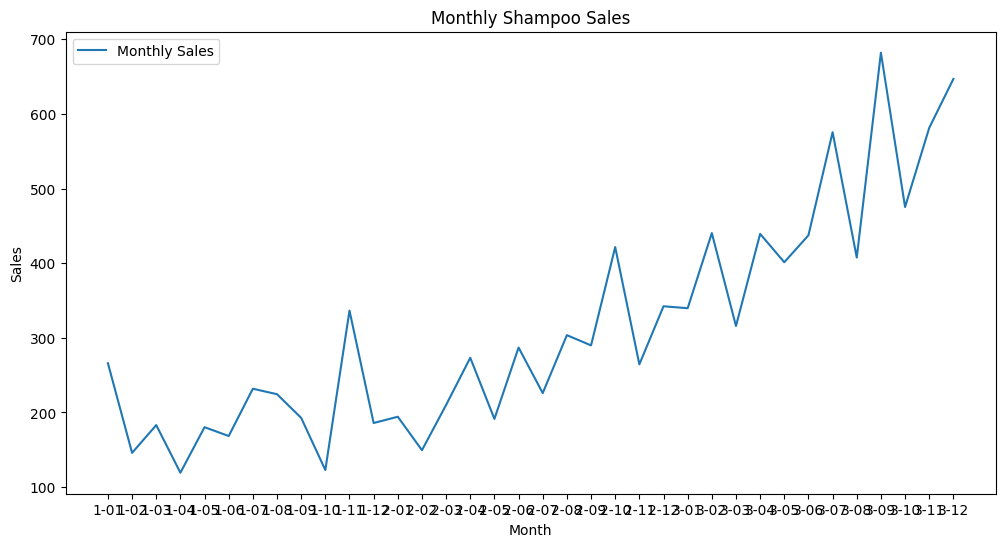

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sun, 03 Aug 2025   AIC                            408.969
Time:                        15:47:31   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


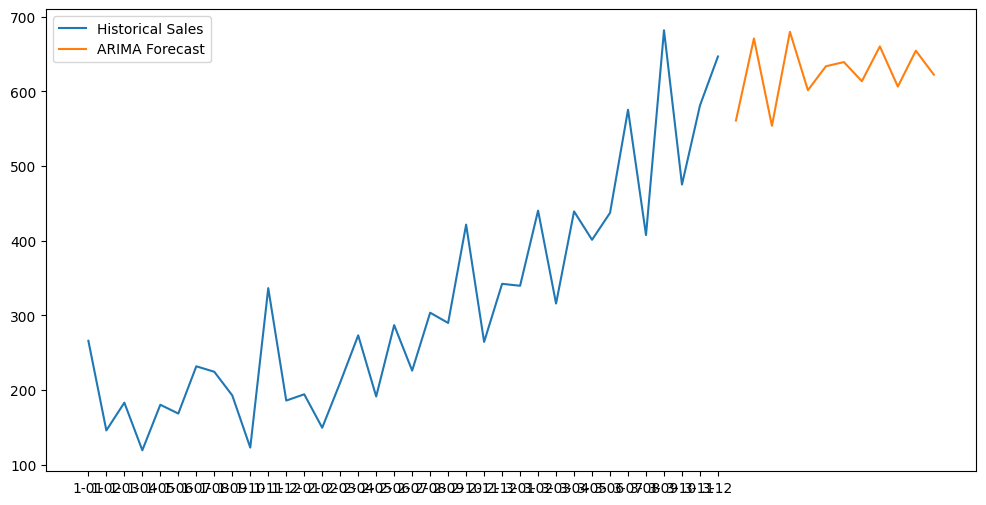

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0384 - val_loss: 0.1625
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0124 - val_loss: 0.1125
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.1123
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - val_loss: 0.1143
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0184 - val_loss: 0.1088
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - val_loss: 0.1024
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0139 - val_loss: 0.0782
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - val_loss: 0.0760
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175 - val_loss: 0.0823
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0218 - val_loss: 0.0784
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - val_loss: 0.0757
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - val_loss: 0.0

ValueError: x and y must have same first dimension, but have shapes (6,) and (10, 1)

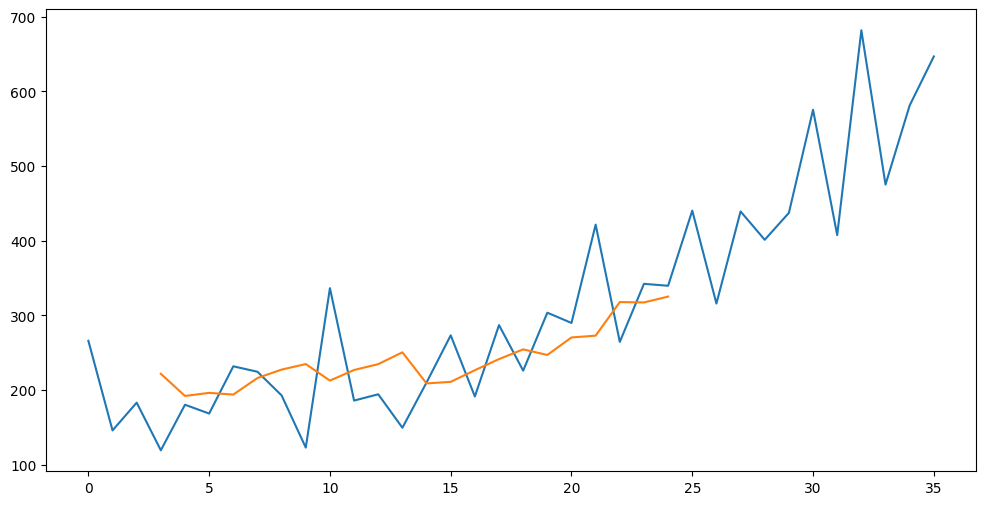

In [3]:
# Sales Forecasting with ARIMA & LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load dataset (example retail sales monthly data)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)
df.columns = ['Sales']

# Step 2: Plot time series
plt.figure(figsize=(12,6))
plt.plot(df, label='Monthly Sales')
plt.title('Monthly Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 3: ARIMA Modeling
arima_model = ARIMA(df, order=(5,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecast next 12 months with ARIMA
arima_forecast = arima_result.forecast(steps=12)
print("ARIMA Forecast for next 12 months:\n", arima_forecast)

plt.figure(figsize=(12,6))
plt.plot(df, label='Historical Sales')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()

# Step 4: Prepare data for LSTM
dataset = df.values.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(dataset)

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 3
X, y = create_dataset(dataset_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Train-test split
train_size = int(len(X)*0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 6: Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 7: Train LSTM
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1, verbose=1)

# Step 8: Prediction and inverse transform
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# Step 9: Evaluate
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Step 10: Plot results
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(dataset_scaled), label='Original Sales')
plt.plot(range(time_step, len(train_predict)+time_step), train_predict, label='Train Predict')
plt.plot(range(len(train_predict)+(time_step*2)+1, len(dataset_scaled)-1), test_predict, label='Test Predict')
plt.title('Sales Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()
